In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.decomposition import PCA

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv("/content/drive/MyDrive/praktikum/Praktikum 11/Data/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


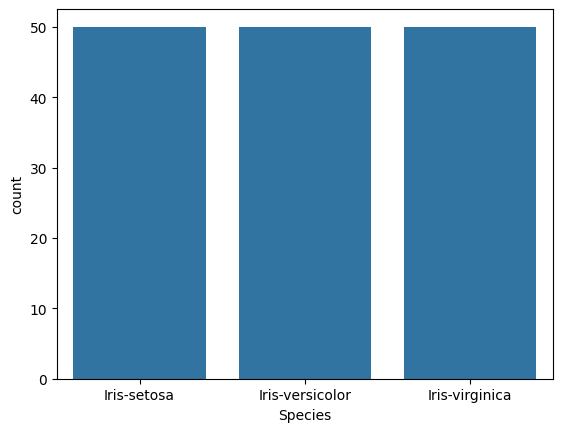

In [30]:
sns.countplot(x="Species", data=df)
plt.show()

In [31]:
x = df.drop(["Id", "Species"],axis=1)

In [32]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoder"] = le.fit_transform(df["Species"])

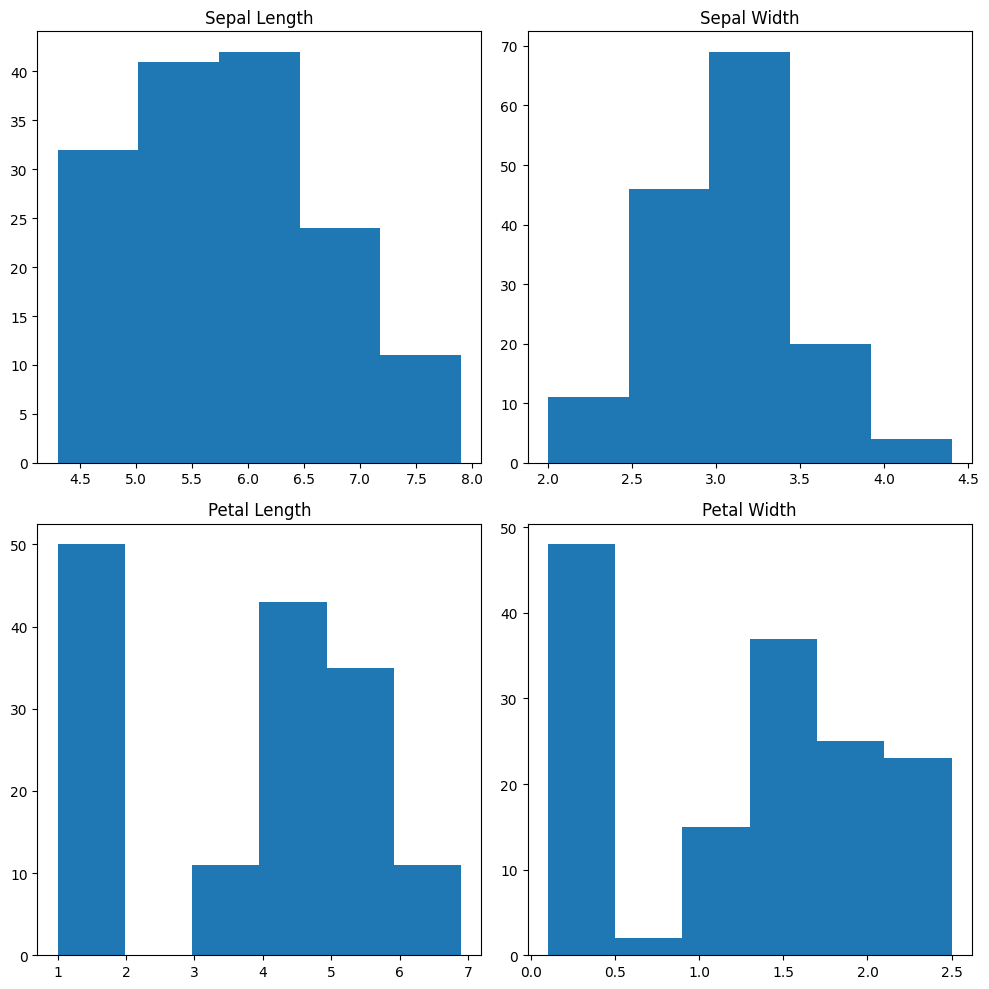

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].set_title('Sepal Length')
axes[0, 0].hist(x["SepalLengthCm"], bins=5)

axes[0, 1].set_title('Sepal Width')
axes[0, 1].hist(x["SepalWidthCm"], bins=5)

axes[1, 0].set_title('Petal Length')
axes[1, 0].hist(x["PetalLengthCm"], bins=6)

axes[1, 1].set_title('Petal Width')
axes[1, 1].hist(x["PetalWidthCm"], bins=6)

plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

scaler = StandardScaler()
x = scaler.fit_transform(x)
x[:5]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

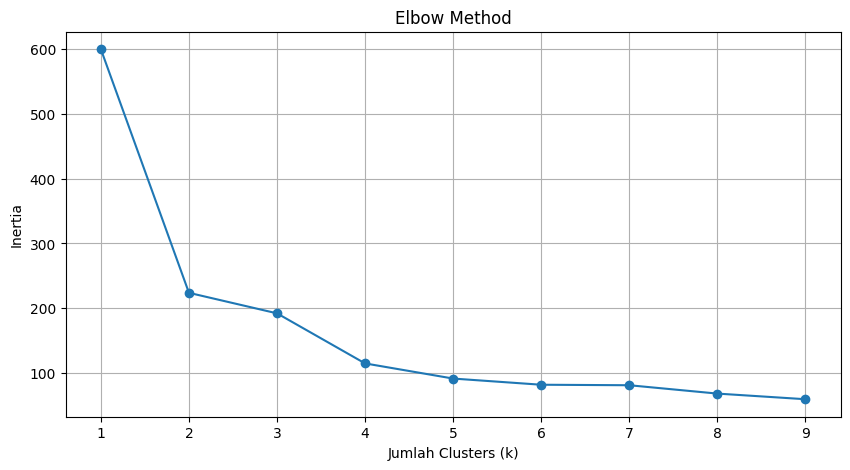

In [36]:
inertia_list = []
x_range = range(1, 10)

for k in x_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(x)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(x_range, inertia_list, marker='o')
plt.xlabel('Jumlah Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [37]:
#kmeans = KMeans(n_clusters=3, init="k-means++",random_state=42)
#kmeans.fit(x)

In [38]:
#Labels = kmeans.predict(x)

In [39]:
#df["Cluster"] = Labels

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster"] = kmeans.fit_predict(x)

print("Cluster ditemukan:", df["Cluster"].unique())


Cluster ditemukan: [1 2 0]


In [41]:
sil_score = silhouette_score(x, df["Cluster"])
print("\n===== SILHOUTE SCORE =====")
print("Silhoute Score:", sil_score)


===== SILHOUTE SCORE =====
Silhoute Score: 0.4556692449110409


In [42]:
print("Confusion Matrix")
# Convert 'Species' string labels to numerical labels for comparison
df['Species_numerical'] = df['Species'].astype('category').cat.codes
cm = confusion_matrix(df['Species_numerical'], df['Cluster'])
print(cm)

Confusion Matrix
[[ 0 50  0]
 [38  0 12]
 [11  0 39]]


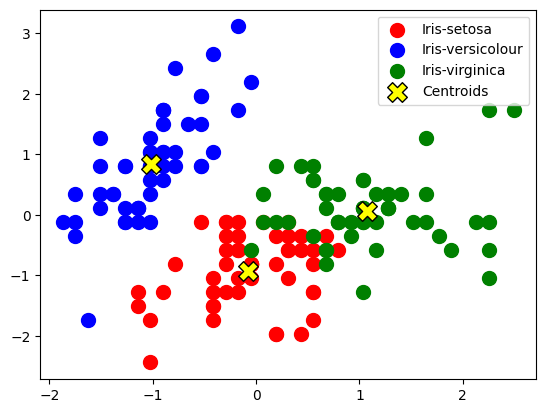

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster"] = kmeans.fit_predict(x)

plt.scatter(x[df["Cluster"] == 0, 0], x[df["Cluster"] == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[df["Cluster"] == 1, 0], x[df["Cluster"] == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[df["Cluster"] == 2, 0], x[df["Cluster"] == 2, 1], s=100, c='green', label='Iris-virginica')

# plot centroid
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='yellow',
    marker='X',
    edgecolors='black',
    label='Centroids'
)

plt.legend()
plt.show()

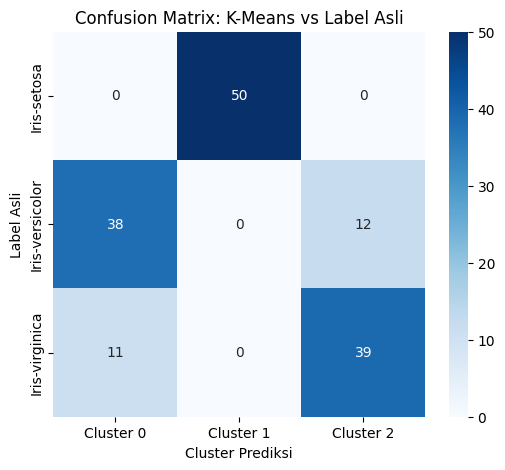

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

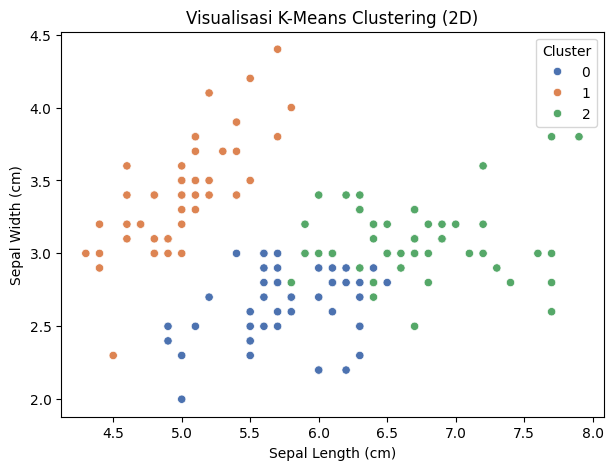

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

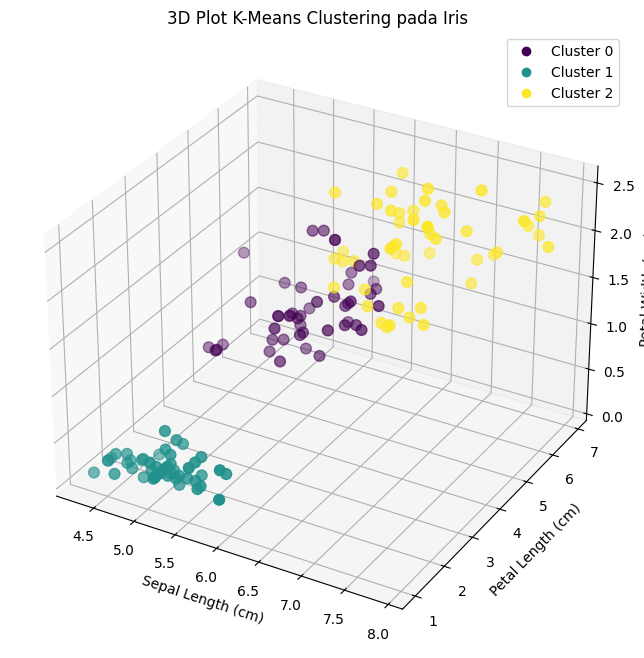

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()